In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from idtxl.multivariate_te import MultivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_excel('./log3.xlsx')
raw_data.set_index('Date', inplace=True)
names = raw_data.columns
yr19 = raw_data.loc[20190302 : 20191031]
yr20 = raw_data.loc[20200301 : ]

In [4]:
yr20

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
Date,,,,,,,,,,,,,,,,,,,,,
20200301,-0.338178,0.144161,0.137193,0.048117,0.133800,0.059656,0.000465,-0.121216,0.132356,0.162596,...,-0.090477,0.052660,-0.026463,0.147968,-0.177391,-0.148990,0.157436,-0.538146,-0.849563,0.124511
20200302,0.285865,-0.048743,-0.086924,-0.027536,-0.089208,-0.053681,0.008661,0.146725,-0.091223,-0.103643,...,0.098036,-0.057238,0.015945,-0.076223,0.162651,0.091744,-0.105659,0.384545,0.648249,-0.085154
20200303,0.007424,-0.004593,-0.006329,-0.002704,-0.004090,-0.004030,-0.004993,-0.006043,-0.002482,-0.008135,...,0.000917,-0.005886,0.003183,-0.005475,-0.003976,0.003034,-0.006208,0.013994,0.012363,-0.007977
20200304,-0.010922,0.003889,0.004616,0.001853,0.004931,0.001576,-0.002697,-0.006658,0.007278,0.002774,...,-0.005826,0.002674,-0.001501,0.001839,-0.003817,-0.005854,0.006998,-0.018477,-0.027787,0.005729
20200306,-0.001010,0.000236,-0.003299,-0.002895,-0.002738,0.003176,-0.003565,-0.013410,-0.003333,-0.003969,...,-0.003790,-0.005498,-0.001934,-0.003124,-0.002275,0.006725,-0.004644,-0.006430,-0.009750,-0.003965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201021,0.002836,0.002027,0.000594,0.000051,0.001753,0.000756,0.000540,-0.003754,0.000047,-0.000020,...,-0.000910,0.000123,-0.000136,-0.000140,-0.000903,0.000572,0.000313,-0.000749,-0.002841,-0.000056
20201022,0.002015,-0.002567,-0.002486,-0.001562,-0.002438,-0.001657,-0.001962,-0.000208,-0.000313,0.001123,...,-0.000279,-0.003034,-0.000492,-0.001404,0.002198,0.006231,-0.000956,-0.003638,-0.001797,-0.000012
20201023,-0.006279,0.000625,-0.001243,-0.004557,-0.003214,0.004625,-0.003725,-0.015442,-0.001043,-0.004219,...,-0.007682,-0.005662,0.002089,-0.001611,-0.008953,0.005558,-0.003350,-0.009774,-0.014068,-0.002877


In [5]:
x = yr20[['강남구']]
x2 = np.array(list(x['강남구']))
y = yr20[['동대문구']]
y2 = np.array(list(y['동대문구']))

In [6]:
x2.shape

(238,)

In [7]:
x3 = x2.reshape(1,238,1)
y3 = y2.reshape(1,238,1)

In [8]:
y3

array([[[-8.51470845e-06],
        [-3.53418042e-03],
        [-1.34102244e-03],
        [ 9.76373967e-04],
        [-7.98428562e-03],
        [-1.76075742e-03],
        [-1.78115721e-03],
        [ 2.86672524e-03],
        [ 4.66671863e-03],
        [-2.28703082e-01],
        [ 2.20086723e-01],
        [-1.89467569e-03],
        [ 9.78112466e-04],
        [ 2.88685385e-03],
        [ 8.15968160e-03],
        [-3.00087047e-03],
        [-2.28601030e-03],
        [ 2.21868070e-03],
        [-8.12419692e-03],
        [-2.12323007e-02],
        [ 1.44399492e-02],
        [ 1.52746326e-02],
        [-2.11598724e-03],
        [ 1.04757798e-04],
        [ 9.42326670e-04],
        [-2.09239324e-03],
        [-8.49911087e-03],
        [-2.78136045e-03],
        [ 1.22741147e-02],
        [ 1.52991545e-02],
        [-1.38608982e-03],
        [-1.37525790e-03],
        [-5.59270869e-03],
        [-7.02547181e-03],
        [-2.59983978e-03],
        [ 1.55694504e-02],
        [-5.55542972e-04],
 

In [9]:
arr = np.append(x3, y3, axis=0)

In [10]:
arr.shape

(2, 238, 1)

In [11]:
name_list = list(names)

In [12]:
y = x3
for i in range(1, len(name_list)):
    x = yr20[[name_list[i]]]
    x2 = np.array(list(x[name_list[i]]))
    x3 = x2.reshape(1,238,1)
    y = np.append(y,x3, axis=0)

In [13]:
y.shape

(25, 238, 1)

In [14]:
data = Data(y, dim_order='psr')

Adding data with properties: 25 processes, 238 samples, 1 replications
overwriting existing data



####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]
testing candidate: (0, 7) 
maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 1)

testing candidate: (9, 7) maximum statistic, n_perm: 200
testing candidate: (16, 6) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(9, 7)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(2, 7), (2, 1), (2, 2), (2, 3), (2, 5), (2, 4), (2, 6), (9, 7)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(9, 7)]
final target samples: [(2, 7), (2, 1), (2, 2), (2, 3), (2, 5), (2, 4), (2, 6)]



####### analysing target with index 3 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 3 - testing sources [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]
testing cand

testing candidate: (16, 1) maximum statistic, n_perm: 200
testing candidate: (9, 5) maximum statistic, n_perm: 200
testing candidate: (9, 3) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(16, 1), (9, 5)]
testing candidate: (9, 5) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(5, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (16, 1), (9, 5)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 2 selected sources
final source samples: [(16, 1), (9, 5)]
final target samples: [(5, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]



####### analysing target with index 6 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 6 - testing sources [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

--

testing candidate: (16, 6) maximum statistic, n_perm: 200
testing candidate: (1, 7) maximum statistic, n_perm: 200
testing candidate: (16, 5) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(16, 6), (1, 7)]
testing candidate: (1, 7) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(8, 7), (8, 1), (8, 2), (8, 3), (8, 5), (8, 4), (8, 6), (16, 6), (1, 7)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 2 selected sources
final source samples: [(16, 6), (1, 7)]
final target samples: [(8, 7), (8, 1), (8, 2), (8, 3), (8, 5), (8, 4), (8, 6)]



####### analysing target with index 9 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 9 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

-

testing candidate: (12, 7) maximum statistic, n_perm: 200
testing candidate: (6, 6) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(12, 7)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (12, 7)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(12, 7)]
final target samples: [(11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6)]



####### analysing target with index 12 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 12 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7)]
testi

testing candidate: (0, 7) maximum statistic, n_perm: 200
testing candidate: (15, 7) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(0, 7)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(14, 7), (14, 2), (14, 5), (0, 7)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(0, 7)]
final target samples: [(14, 7), (14, 2), (14, 5)]



####### analysing target with index 15 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 15 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (15, 7)]
testing candidate: (15, 7) 
maximum statistic, n_perm: 200
tes

testing candidate: (15, 7) maximum statistic, n_perm: 200
testing candidate: (2, 1) maximum statistic, n_perm: 200
testing candidate: (4, 1) maximum statistic, n_perm: 200
testing candidate: (5, 1) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(15, 7), (2, 1), (4, 1)]
testing candidate: (4, 1) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(17, 1), (17, 2), (17, 7), (15, 7), (2, 1), (4, 1)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 3 selected sources
final source samples: [(15, 7), (2, 1), (4, 1)]
final target samples: [(17, 1), (17, 2), (17, 7)]



####### analysing target with index 18 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 18 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19,

testing candidate: (23, 7) maximum statistic, n_perm: 200
testing candidate: (3, 1) maximum statistic, n_perm: 200
testing candidate: (15, 7) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(23, 7), (3, 1)]
testing candidate: (3, 1) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(20, 7), (20, 2), (20, 5), (23, 7), (3, 1)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 2 selected sources
final source samples: [(23, 7), (3, 1)]
final target samples: [(20, 7), (20, 2), (20, 5)]



####### analysing target with index 21 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 21 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]

---------------------------- (1) include target candidates

testing candidate: (12, 7) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
no sources selected, nothing to prune ...

---------------------------- (4) final statistics
no sources selected ...
final source samples: []
final target samples: [(23, 7), (23, 2), (23, 5)]



####### analysing target with index 24 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 24 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

---------------------------- (1) include target candidates
candidate set: [(24, 1), (24, 2), (24, 3), (24, 4), (24, 5), (24, 6), (24, 7)]
testing candidate: (24, 7) 
maximum statistic, n_perm: 200
testing candidate: (24, 1) maximum statistic, n_perm: 200
testing candidate: (24, 2) maximum statistic, n_perm: 200
testing candidate: (24, 3) maximum statistic, n_perm: 200
testing candidate: (24, 5) maximum statis

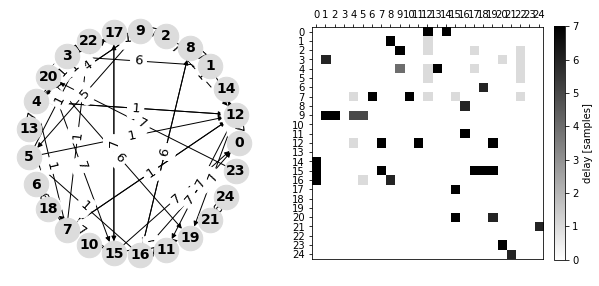

In [15]:
network_analysis = MultivariateTE()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 7,
            'min_lag_sources': 1}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=data)

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()

In [16]:
x = yr19[['강남구']]
x2 = np.array(list(x['강남구']))
y = yr19[['동대문구']]
y2 = np.array(list(y['동대문구']))

In [17]:
x3 = x2.reshape(1,238,1)
y3 = y2.reshape(1,238,1)

In [18]:
y = x3
for i in range(1, len(name_list)):
    x = yr19[[name_list[i]]]
    x2 = np.array(list(x[name_list[i]]))
    x3 = x2.reshape(1,238,1)
    y = np.append(y,x3, axis=0)

In [19]:
data2 = Data(y, dim_order='psr')

Adding data with properties: 25 processes, 238 samples, 1 replications
overwriting existing data



####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]
testing candidate: (0, 7) 
maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 1)

testing candidate: (22, 7) maximum statistic, n_perm: 200
testing candidate: (5, 1) maximum statistic, n_perm: 200
testing candidate: (16, 1) maximum statistic, n_perm: 200
testing candidate: (3, 1) maximum statistic, n_perm: 200
testing candidate: (22, 1) maximum statistic, n_perm: 200
testing candidate: (20, 1) maximum statistic, n_perm: 200
testing candidate: (6, 6) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(22, 7), (5, 1), (16, 1), (3, 1), (22, 1), (20, 1)]
testing candidate: (20, 1) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(2, 7), (2, 2), (2, 1), (2, 4), (22, 7), (5, 1), (16, 1), (3, 1), (22, 1), (20, 1)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 6 selected sources
final source samples: [(22, 7), (5, 1), (16, 1), (3, 1), (22, 1), (20, 1)]
final target samples: [(2, 7

testing candidate: (7, 7) maximum statistic, n_perm: 200
testing candidate: (20, 1) maximum statistic, n_perm: 200
testing candidate: (3, 2) maximum statistic, n_perm: 200
testing candidate: (6, 1) maximum statistic, n_perm: 200
testing candidate: (18, 5) maximum statistic, n_perm: 200
testing candidate: (17, 2) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(7, 7), (20, 1), (3, 2), (6, 1), (18, 5)]
testing candidate: (18, 5) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(5, 2), (5, 5), (5, 3), (7, 7), (20, 1), (3, 2), (6, 1), (18, 5)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 5 selected sources
final source samples: [(7, 7), (20, 1), (3, 2), (6, 1), (18, 5)]
final target samples: [(5, 2), (5, 5), (5, 3)]



####### analysing target with index 6 from list [0, 1, 2, 3, 4, 5, 6, 7, 8

testing candidate: (23, 7) maximum statistic, n_perm: 200
testing candidate: (12, 1) maximum statistic, n_perm: 200
testing candidate: (6, 6) maximum statistic, n_perm: 200
testing candidate: (16, 2) maximum statistic, n_perm: 200
testing candidate: (4, 7) maximum statistic, n_perm: 200
testing candidate: (6, 1) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(23, 7), (12, 1), (6, 6), (16, 2), (4, 7)]
testing candidate: (4, 7) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(8, 7), (8, 2), (23, 7), (12, 1), (6, 6), (16, 2), (4, 7)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 5 selected sources
final source samples: [(23, 7), (12, 1), (6, 6), (16, 2), (4, 7)]
final target samples: [(8, 7), (8, 2)]



####### analysing target with index 9 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

testing candidate: (17, 1) maximum statistic, n_perm: 200
testing candidate: (12, 1) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(17, 1)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(11, 2), (11, 1), (17, 1)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(17, 1)]
final target samples: [(11, 2), (11, 1)]



####### analysing target with index 12 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 12 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7)]
testing candidate: (12, 7) 
maximum statistic, n_perm: 200
testing candidate

testing candidate: (22, 7) maximum statistic, n_perm: 200
testing candidate: (4, 1) maximum statistic, n_perm: 200
testing candidate: (24, 1) maximum statistic, n_perm: 200
testing candidate: (5, 1) maximum statistic, n_perm: 200
testing candidate: (22, 3) maximum statistic, n_perm: 200
testing candidate: (6, 6) maximum statistic, n_perm: 200
testing candidate: (19, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(22, 7), (4, 1), (24, 1), (5, 1), (22, 3), (6, 6)]
testing candidate: (6, 6) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(14, 7), (14, 2), (14, 5), (22, 7), (4, 1), (24, 1), (5, 1), (22, 3), (6, 6)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 6 selected sources
final source samples: [(22, 7), (4, 1), (24, 1), (5, 1), (22, 3), (6, 6)]
final target samples: [(14, 7), (14, 

testing candidate: (16, 7) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
no sources selected, nothing to prune ...

---------------------------- (4) final statistics
no sources selected ...
final source samples: []
final target samples: [(17, 3), (17, 1), (17, 2), (17, 5)]



####### analysing target with index 18 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 18 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(18, 1), (18, 2), (18, 3), (18, 4), (18, 5), (18, 6), (18, 7)]
testing candidate: (18, 7) 
maximum statistic, n_perm: 200
testing candidate: (18, 2) maximum statistic, n_perm: 200
testing candidate: (18, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate 

testing candidate: (22, 7) maximum statistic, n_perm: 200
testing candidate: (3, 6) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(22, 7)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(20, 7), (20, 2), (22, 7)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(22, 7)]
final target samples: [(20, 7), (20, 2)]



####### analysing target with index 21 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 21 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]

---------------------------- (1) include target candidates
candidate set: [(21, 1), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (21, 7)]
testing candidate: (21, 7) 
maximum statistic, n_perm: 200
testing candidate:

testing candidate: (3, 6) maximum statistic, n_perm: 200
testing candidate: (22, 7) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(3, 6)]
 -- significant

---------------------------- (4) final statistics
selected variables: [(23, 7), (3, 6)]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
final source samples: [(3, 6)]
final target samples: [(23, 7)]



####### analysing target with index 24 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Target: 24 - testing sources [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

---------------------------- (1) include target candidates
candidate set: [(24, 1), (24, 2), (24, 3), (24, 4), (24, 5), (24, 6), (24, 7)]
testing candidate: (24, 7) 
maximum statistic, n_perm: 200
testing candidate: (24, 2) maximum stat

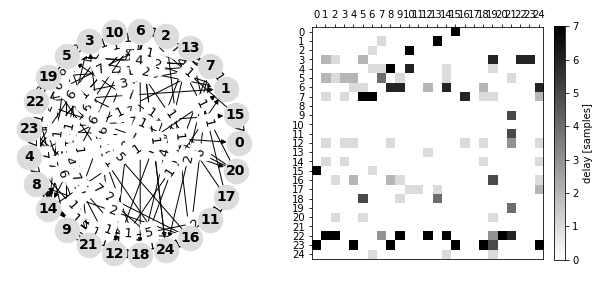

In [20]:
network_analysis = MultivariateTE()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 7,
            'min_lag_sources': 1}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=data2)

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()